## IE517 HW #3 Part 1

Yaxuan Wang

09/12/2020

In [1]:
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as stat
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/Yaxuan Mandy Wang/Desktop/HY_Universe_corporate bond.csv')
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [3]:
df.describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721.000000,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
mean,10.307872,8.299295e+08,113.968997,18.218230,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,...,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,63.051382,5.802790e+08,101.893176,7.872071,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,...,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,0.000000,3.700000e+08,11.930000,4.388758,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,...,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,5.000000,5.000000e+08,65.170000,12.738630,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,...,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,6.250000,6.500000e+08,97.370000,16.538471,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,...,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,7.750000,1.000000e+09,121.770000,22.120108,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,...,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000
max,999.000000,7.364026e+09,1217.570000,54.673908,0.546739,57935.000000,8.979960e+09,3.400000e+06,3.400000e+06,1667.000000,...,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,8.728140e+08,1.002500e+08,513.769231,160.000000


The `describe()` shows the summary statistics of each feature. However, it is hard to see just from numbers. Thus, we will do some visualization. 

### Checking if there are missing values 

In [4]:
for i in df.columns:
    if 'Nan' in df[i].tolist():
        print(i)

1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Months in JNK
Months in HYG
Months in Both


As we can see, those variables have the missing values. There are two solutions we deal with NaN. First, we can just simply ignore those by using `Dropna`. Second, we can replace those missing values by the mean imputation, ere we simply replace them by the average value of the entire attibute column. In this case, I will just simply ignore the missing values. 

### QQ plot of one of the numeric attributes that might be normally distributed, Issued Amount

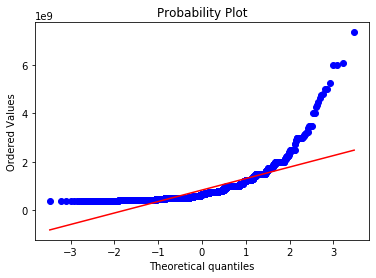

In [5]:
stats.probplot(df['Issued Amount'], dist = 'norm', plot = pylab)
pylab.show()

As we can see, the points are not follow the straight line. The points at both tails are deviated from the stright line. Thus, the attribute `Issued Amount`is not normal distributed. 

### Heatmap of 5-10 of the numeric attributes

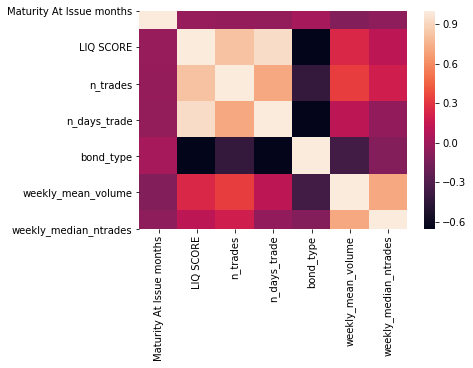

In [6]:
# select interested features
x = pd.DataFrame(df.iloc[0:60, [11, 13, 20, 21, 25, 29, 31, 36]].corr())

sns.heatmap(x)
plt.show()

The heatmap shows the correlation among many numerical variables. the `liq score`, `n_trades`, and `n_days_trade` are light yellow with each pair, which means they have strong positive correlations. 

### Scatter plot between liquid scores and number of trades

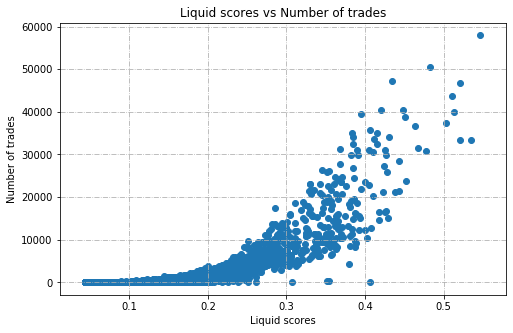

In [7]:
plt.figure(figsize = (8, 5))
plt.grid(True, linestyle = '-.')
plt.xlabel('Liquid scores')
plt.ylabel('Number of trades')
plt.title('Liquid scores vs Number of trades')
_ = plt.scatter(df['LIQ SCORE'], df['n_trades'])

Since the heatmap shows there are strong positive association between `liq score` and `n_trades`, we will do further EDA on their scatter plot. From the scatter plot, as the liquid scores increase, the majority number of trades will also increase. Notice that there are some extreme cases as weel. When some points whose liquid scores are between 0.3 to 0.4, their number of trades are still zero. Furthermore, the trend does not appear stright linear relationship. It is more like a convex.  

### Histogram of the categorical variables S_and_P

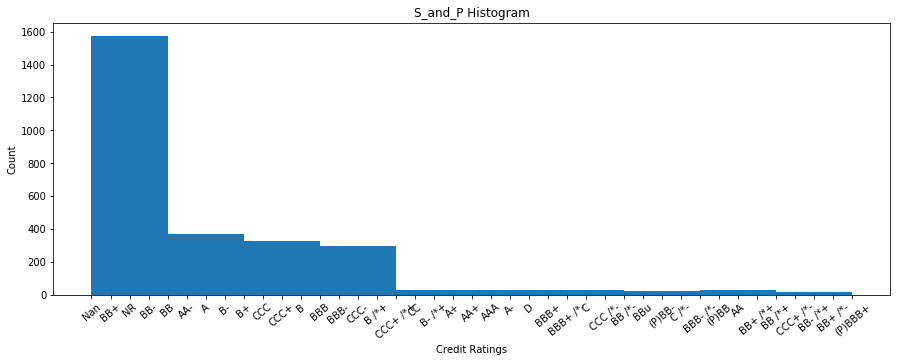

In [8]:
plt.figure(figsize = (15, 5))
plt.xlabel('Credit Ratings')
plt.ylabel('Count')
plt.title('S_and_P Histogram')
plt.xticks(fontsize = 10, rotation = 40)
_ = plt.hist(df['S_and_P'])

From the histogram of credit ratings by S&P, the most of the case's credit rating are missing values. Thus, we should not just simply remove those. And the rating of BB+, NR, and BB- are also highest. Then, suddenly the rating of BB, AA-, A, and B- decreased to 400 count. Thus,we can conclude that if we ignore the missing values, the rating of BB+ and BB- are the most common crediting rating in the industry, up to 1600. Then, the second most common ratings are BB, AA- and A, and B-, up to 400 count. So majority of the bond are pretty good. 

### Box plot

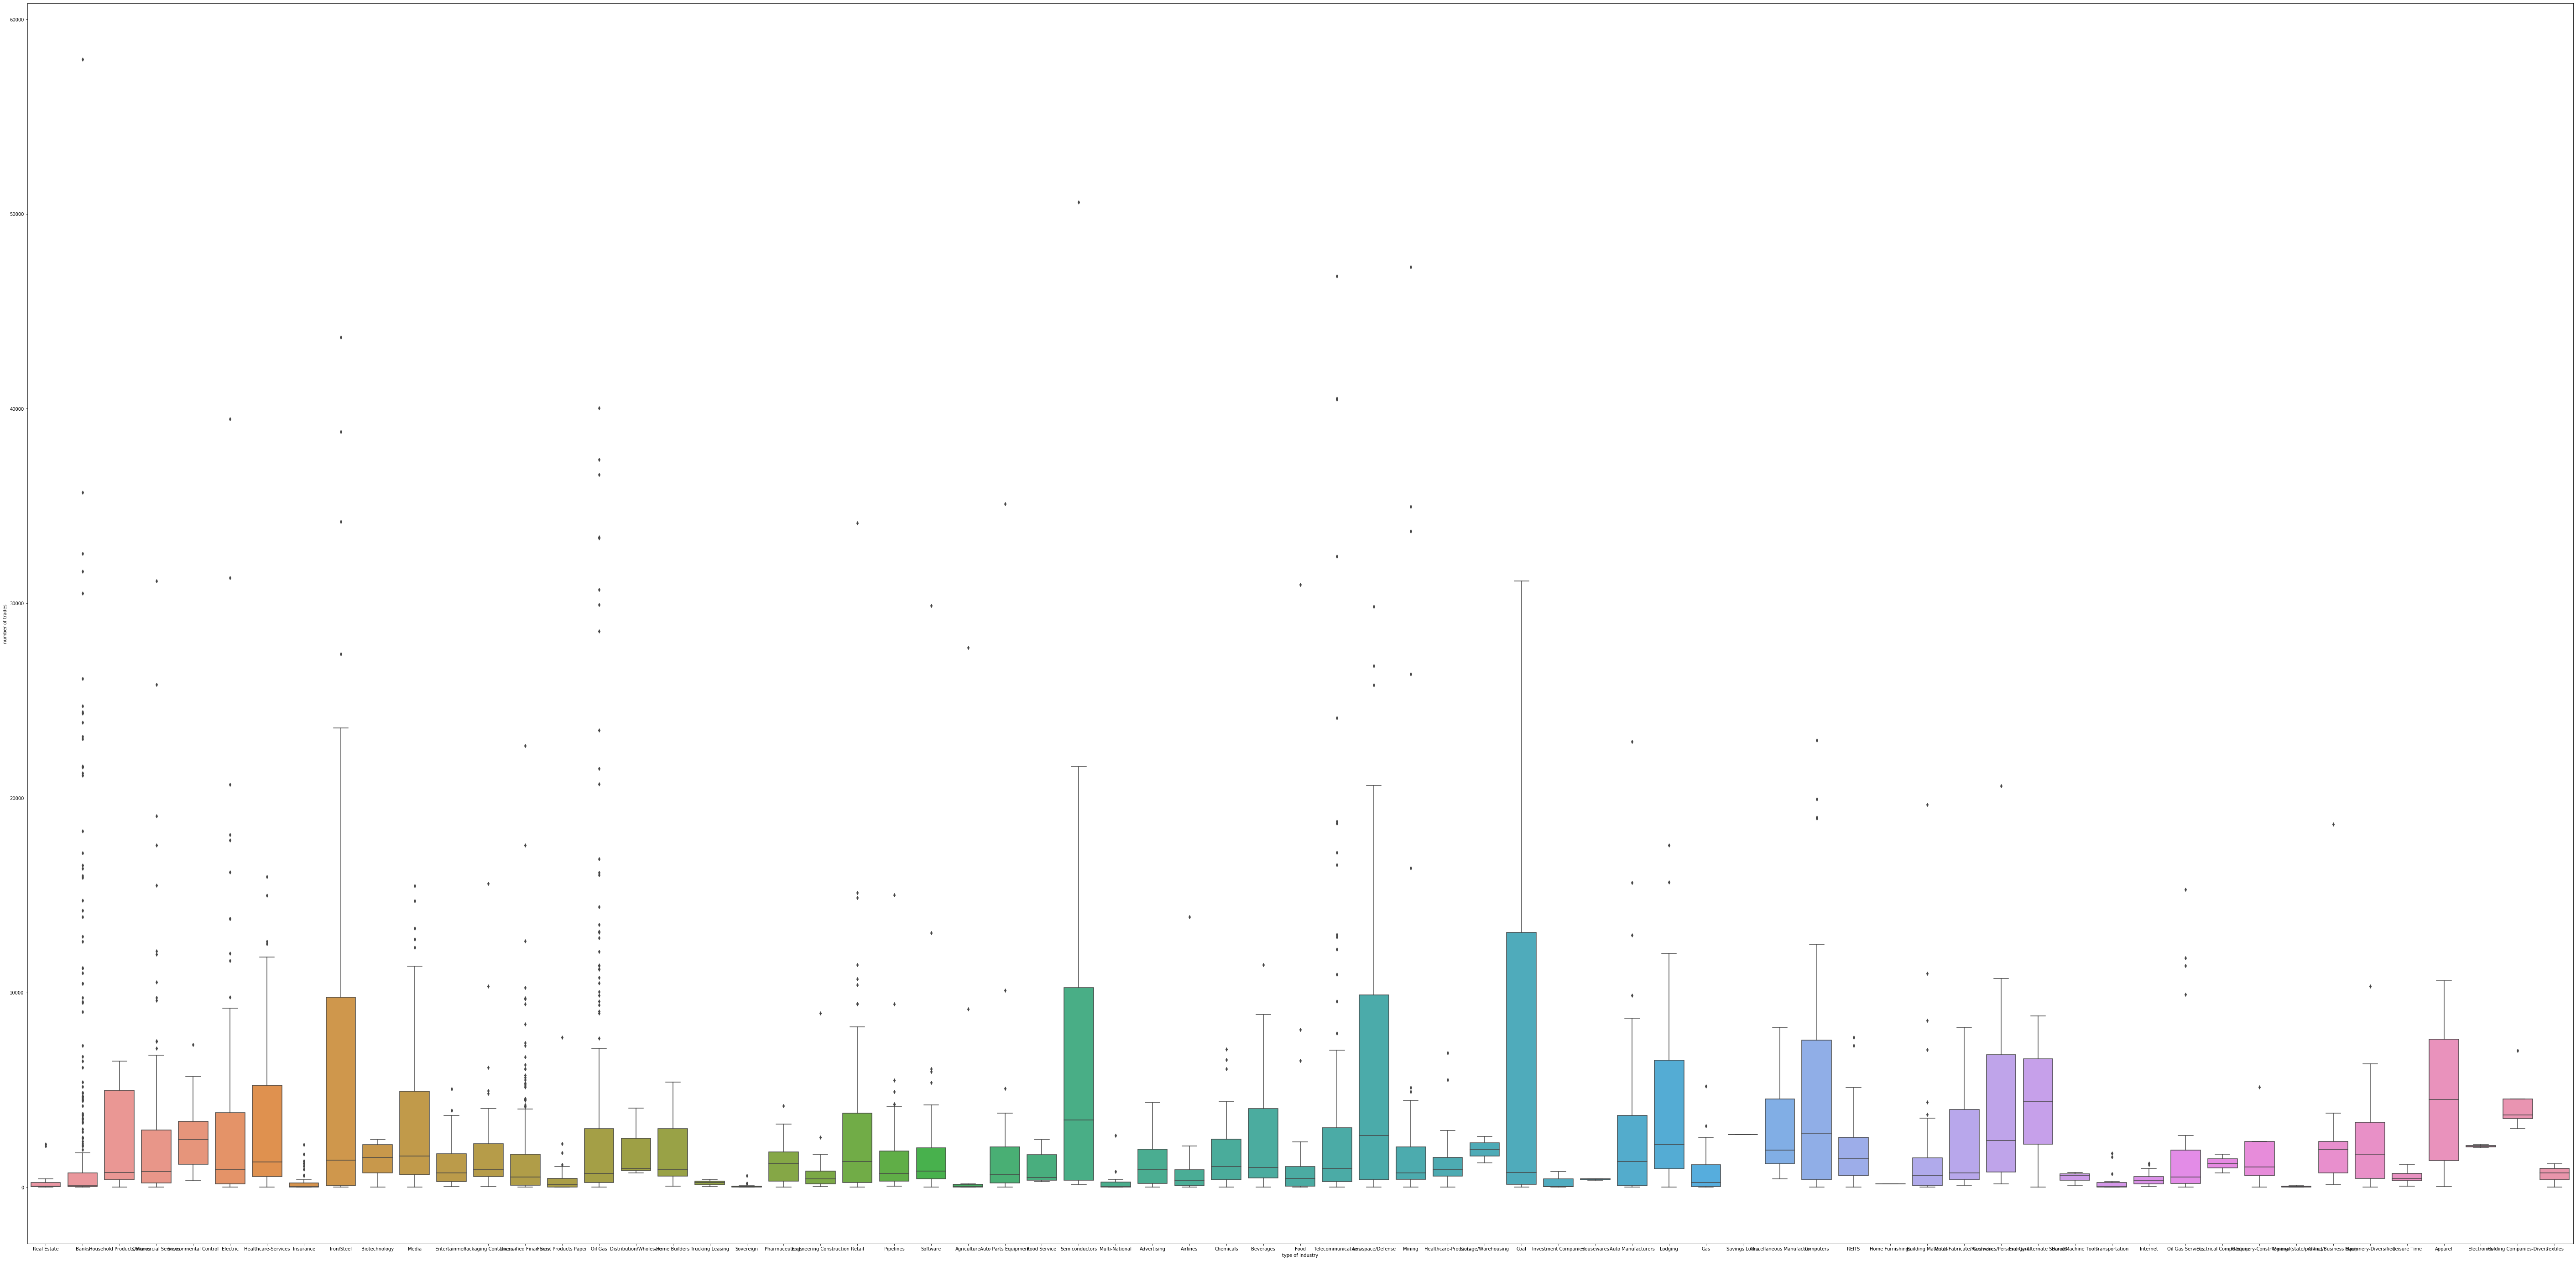

In [9]:
plt.figure(figsize = (100, 50))
_ = sns.boxplot(x='Industry', y='n_trades', data=df)
_ = plt.xlabel('type of industry')
_ = plt.ylabel('number of trades')
plt.show()

The class of `Coal` has the biggest spread. The class of `Electron` has the smallest spread. Additionally, we can see that many class have many extreme cases. 

### Conclude the best EDA method

From all those EDA methods, I think the heatmap include the information well at visualization. Yhe color-code makes easier to see the association between each pair of variable. In quantative, the histogram has the best ability to show. It is very easy to see how count of each class. 

In [10]:
print("My name is {Yaxuan Wang}")
print("My NetID is: {662869931}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Yaxuan Wang}
My NetID is: {662869931}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
